In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix
import re
import numpy as np

# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
file = 'GOT_character_predictions.xlsx'
got = pd.read_excel(io=file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [3]:
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
age                           0.09
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveMother                -0.04
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.09
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

Adding a new variable called agedob which is the sum of age and dateofbirth. We did so since these values are relative so the sum gives us a more realistic value.

In [5]:
got.insert(loc=0,
          column='agedob',
          value = got["age"] + got["dateOfBirth"])

In [6]:
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [7]:
got.isnull().sum()

agedob                        1513
S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

This part is optional, I have tried m_ columns and the results were not so bright so commenting this out

In [8]:
#for col in got:
#
#    """ Create columns that are 0s if a value was not missing and 1 if
#    a value is missing. """
    
#    if got[col].isnull().any():
#        got['m_'+col] = got[col].isnull().astype(int)

In [9]:
print(got["agedob"].mean())
print(got["age"].mean())
got["age"].describe()
got["age"].sort_values()

283.8013856812933
-1293.5635103926097


1868   -298001.0
1684   -277980.0
329          0.0
790          0.0
1921         1.0
          ...   
1939         NaN
1941         NaN
1942         NaN
1943         NaN
1944         NaN
Name: age, Length: 1946, dtype: float64

In [10]:
got.isnull().sum()

agedob                        1513
S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_agedob                         0
m_title                          0
m_culture           

In [11]:
print(got["name"][got["age"] == -298001])
print(got["name"][got["age"] == -277980])

1868    Rhaego
Name: name, dtype: object
1684    Doreah
Name: name, dtype: object


In [12]:
got["isAliveMother"].value_counts()

1.0    15
0.0     6
Name: isAliveMother, dtype: int64

In [13]:
print(got["name"][got["age"] > 100])

Series([], Name: name, dtype: object)


In [14]:
got['title'] = got['title'].fillna('unknown_title')
got['culture']=got['culture'].fillna('unknown_culture')
got['house'] = got['house'].fillna('unknown_house')
got['mother']=got['mother'].fillna('unknown_mother')
got['father']=got['father'].fillna('unknown_father')
got['heir']=got['heir'].fillna('unknown_heir')
got['house']=got['house'].fillna('unknown_house')
got['spouse']=got['spouse'].fillna('unknown_spouse')

In [15]:
fill=got['age'].mean()
got['age']=got['age'].fillna(fill)
fill_agedob = got['agedob'].mean()
got['agedob']=got['agedob'].fillna(fill_agedob)

In [16]:
#replace unknown dummy variables with -1
got.fillna(value=-1, inplace=True)

In [17]:
clan = { 'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari'],
    'Asshai': ["Asshai'i", 'Asshai'],
    'Andal': ['Andal','Andals'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Astapor': ['Astapor', 'Astapori'],
    'Braavosi': ['Braavosi', 'Braavos'],
    'Dornish': ['Dornishmen', 'Dorne', 'Dornish'],
    'Lhazareen': ['Lhazareen', 'Lhazarene'],
    'Westermen': ['Westermen', 'Westerman', 'Westerlands', 'westermen'],
    'Stormlander': ['Stormlands', 'Stormlander'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Northmen': ['Northern mountain clans', 'Northmen'],
    'Free Folk': ['Wildling', 'Wieldings', 'First men', 'free folk','Free Folk'],
    'Qartheen': ['Qartheen', 'Qarth'],
    'Reach': ['Reach', 'The Reach', 'Reachmen'],
    'Rivermen': ['Rivermen', 'Riverlands'],
    'Ironborn': ['Ironborn', 'Ironmen'],
    'Mereen': ['Meereen', 'Meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['Vale', 'Valemen', 'Vale mountain clans']
}

In [18]:
def get_clan(value):
    value = value.lower()
    v = [k for (k, v) in clan.items() if value in v]
    return v[0] if len(v) > 0 else value.title()
got.loc[:, "culture"] = [get_clan(x) for x in got["culture"]]

In [19]:
hous = {
    'Brotherhood Without Banners': ['Brotherhood Without Banners', 'Brotherhood without Banners', 'Brotherhood without banners']
    }

def get_house(value):
    value = value.lower()
    v = [k for (k, v) in hous.items() if value in v]
    return v[0] if len(v) > 0 else value.title()
got.loc[:, "house"] = [get_house(x) for x in got["house"]]

In [20]:
for val in got:
    print(f" '{val}',")

 'agedob',
 'S.No',
 'name',
 'title',
 'culture',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity',
 'isAlive',
 'm_agedob',
 'm_title',
 'm_culture',
 'm_dateOfBirth',
 'm_mother',
 'm_father',
 'm_heir',
 'm_house',
 'm_spouse',
 'm_isAliveMother',
 'm_isAliveFather',
 'm_isAliveHeir',
 'm_isAliveSpouse',
 'm_age',


In [21]:
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
agedob                        0.28
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_agedob                      0.15
m_age                         0.15
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_mother                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
m_isAliveSpouse               0.05
m_spouse                      0.05
age                           0.05
m_title                       0.04
m_house                       0.04
m_culture                     0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.03
isNoble                      -0.04
isMarried                    -0.05
dateOfBirth                  -0.06
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.12
isAliveFather                -0.12
S.No                         -0.13
isAliveMother       

In [22]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['S.No',
 'name',
 'title',
 'culture',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords'
 '_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity'
 ],
 

 # significant variables only (set 1)
 'logit_sig'    : [
 'S.No',
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : [
 'S.No' ,
 'book1_A_Game_Of_Thrones' ,
 'book2_A_Clash_Of_Kings' ,
 'book3_A_Storm_Of_Swords' ,
 'book4_A_Feast_For_Crows' ,
 'book5_A_Dance_with_Dragons' ,
 'isAliveMother' ,
 'isAliveFather' ,
 'isAliveHeir' ,
 'isAliveSpouse' ,
 'isMarried' ,
 'isNoble' ,
 'age' ,
 'numDeadRelations' ,
 'popularity' ,
 'm_title' ,
 'm_culture' ,
 'm_dateOfBirth' ,
 'm_mother' ,
 'm_father' ,
 'm_heir' ,
 'm_house' ,
 'm_spouse' ,
 'm_isAliveMother' ,
 'm_isAliveFather' ,
 'm_isAliveHeir' ,
 'm_isAliveSpouse' ,
 'm_age' 
     
     
 ]

}

In [23]:
#got_scale_data_1 = got.loc[ : , candidate_dict['logit_sig']]

In [24]:
#for val in got__data:
#    print(f" {val} +")

# GenderGuesser

We will implement GenderGuesser and try to find out the genders of our data

In [25]:
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)
gender_guesser=[]
#print(d.get_gender(u"Bob"))
#print(d.get_gender(u"Sally"))
#print(d.get_gender(u"Pauley")) # should be androgynous
for item in got['name']:
    _gender=d.get_gender(re.findall(r'\S+', item)[0])# split first name only
    gender_guesser.append(_gender)
#print(gender_guesser)
got["gender"]=gender_guesser
#check total gender counts
got["gender"].value_counts()

unknown          1384
male              381
female            125
mostly_male        24
mostly_female      21
andy               11
Name: gender, dtype: int64

In [26]:
got['gender'] = got['gender'].map(
                        {
                         'male'     : 'male',
                         'female'     : 'female',
                         'unknown':'unknown',
                         'mostly_male'     : 'male',
                         'mostly_female'      : 'female',
                         'andy'       : 'male'})

# Bins

here we create bins for our data

In [27]:
#ds_got_character_dummies = pd.get_dummies(ds_got_character, columns = ['age_bins', 'dateOfBirth_bins', 'd_culture','gender', 'popularity_bins'])

They are not useful thus removed from code

# StatsModels 

We will now perform statsmodels on our data, lets prepare our data

In [28]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['name',
 'title',
 'culture',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords'
 '_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity'
 ],
 

 # significant variables only (set 1)
 'logit_sig'    : [
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : [
 'book1_A_Game_Of_Thrones' ,
 'book2_A_Clash_Of_Kings' ,
 'book3_A_Storm_Of_Swords' ,
 'book4_A_Feast_For_Crows' ,
 'book5_A_Dance_with_Dragons' ,
 'isAliveMother' ,
 'isAliveFather' ,
 'isAliveHeir' ,
 'isAliveSpouse' ,
 'isMarried' ,
 'isNoble' ,
 'age' ,
 'numDeadRelations' ,
 'popularity' ,
 'm_title' ,
 'm_culture' ,
 'm_dateOfBirth' ,
 'm_mother' ,
 'm_father' ,
 'm_heir' ,
 'm_house' ,
 'm_spouse' ,
 'm_isAliveMother' ,
 'm_isAliveFather' ,
 'm_isAliveHeir' ,
 'm_isAliveSpouse' ,
 'm_age'],
 
 'logit_sig_3':[
'isAlive',
'name',
'title',
'culture',
'dateOfBirth',
'mother',
'father',
'heir',
'house',
'spouse',
'm_age',
'm_isAliveSpouse',
'm_isAliveHeir',
'm_isAliveFather',
'm_isAliveMother',
'm_spouse',
'm_heir',
'm_mother',
'm_father',
'm_culture',
'numDeadRelations',
'age',
'book2_A_Clash_Of_Kings',
'isNoble',
'isMarried',
'isAliveSpouse',
'isAliveHeir',
'isAliveFather',
'isAliveMother'],
    
 'logit_sig_4':
 ['agedob',
 'book1_A_Game_Of_Thrones' ,
 'book2_A_Clash_Of_Kings' ,
 'book3_A_Storm_Of_Swords' ,
 'book4_A_Feast_For_Crows' ,
 'numDeadRelations' ,
 'popularity'],

 'logit_sit_5':[
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations' ,
 'popularity']
 
    
}

In [29]:
#Creating 3 different selections of variables
got_data_1   = got.drop(['S.No', 'name','isAlive','title','culture', 'dateOfBirth',
                           'mother','father','heir','house','spouse','gender'],axis=1)
got_data_2 = got.drop(['S.No', 'name','isAlive','title','culture','dateOfBirth','age',
                           'mother','father','heir','house','spouse','gender'],axis=1)
got_data_3 = got.drop(['S.No', 'name','isAlive','title','culture',
                           'mother','father','heir','house','spouse','gender'],axis=1)

#our main data
got_data = got.loc[ : , candidate_dict['logit_sig_4']]
#defining our target variable
got_target =  got.loc[ : , 'isAlive']

x_train, x_test, y_train, y_test = train_test_split(
            got_data_3,
            got_target,
            test_size = 0.1,
            random_state = 219,
            stratify = got_target) # preserving balance

# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [30]:
for val in got_data_1:
    print(f" {val} +")

 agedob +
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 book5_A_Dance_with_Dragons +
 isAliveMother +
 isAliveFather +
 isAliveHeir +
 isAliveSpouse +
 isMarried +
 isNoble +
 age +
 numDeadRelations +
 popularity +
 m_agedob +
 m_title +
 m_culture +
 m_dateOfBirth +
 m_mother +
 m_father +
 m_heir +
 m_house +
 m_spouse +
 m_isAliveMother +
 m_isAliveFather +
 m_isAliveHeir +
 m_isAliveSpouse +
 m_age +


In [31]:
for val in got_data_2:
    print(f" {val} +")

 agedob +
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 book5_A_Dance_with_Dragons +
 isAliveMother +
 isAliveFather +
 isAliveHeir +
 isAliveSpouse +
 isMarried +
 isNoble +
 numDeadRelations +
 popularity +
 m_agedob +
 m_title +
 m_culture +
 m_dateOfBirth +
 m_mother +
 m_father +
 m_heir +
 m_house +
 m_spouse +
 m_isAliveMother +
 m_isAliveFather +
 m_isAliveHeir +
 m_isAliveSpouse +
 m_age +


In [32]:
for val in got_data_3:
    print(f" {val} +")

 agedob +
 dateOfBirth +
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 book5_A_Dance_with_Dragons +
 isAliveMother +
 isAliveFather +
 isAliveHeir +
 isAliveSpouse +
 isMarried +
 isNoble +
 age +
 numDeadRelations +
 popularity +
 m_agedob +
 m_title +
 m_culture +
 m_dateOfBirth +
 m_mother +
 m_father +
 m_heir +
 m_house +
 m_spouse +
 m_isAliveMother +
 m_isAliveFather +
 m_isAliveHeir +
 m_isAliveSpouse +
 m_age +


In [33]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ 
 agedob +
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 numDeadRelations +
 popularity
 """,data = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.461291
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.186     
Dependent Variable:    isAlive             AIC:                 1631.4406 
Date:                  2021-12-05 21:47    BIC:                 1675.1841 
No. Observations:      1751                Log-Likelihood:      -807.72   
Df Model:              7                   LL-Null:             -992.53   
Df Residuals:          1743                LLR p-value:         7.7189e-76
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -18.4597   2.6387 -6.9958 0.0000 -23.6314 -13.2879
agedob                    0.0690   0.0093  7.3810 0.0000   0.0507   0.0873
book1_A_Game_Of_Thrones  -0.5982   0.1576 -3.7961 0.0001  -0.9070  -0.2893
book2_A_Clash_Of_Kings   -0.5884   0.1428 -4.1200 0.0000  -0.8683  -0.3085
book3_A_Storm_Of_Swords  -0.4497   0.1476 -3.0457 0.0023  -0.7390  -0.1603
book4_A_Feast_For_Crows   1.3694   0.1451  9.4383 0.0000   1.0850   1.6538
numDeadRelations         -0.1378   0.0546 -2.5239 0.0116  -0.2449  -0.0308
popularity               -1.7691   0.4787 -3.6953 0.0002  -2.7074  -0.8308
==========================================================================

"""

# Logistic Regression

We will now perform Logistic Regression on our data using Scikit-Learn

In [34]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['name',
 'title',
 'culture',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords'
 '_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity'
 ],
 

 # significant variables only (set 1)
 'logit_sig'    : [
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : [
 'book1_A_Game_Of_Thrones' ,
 'book2_A_Clash_Of_Kings' ,
 'book3_A_Storm_Of_Swords' ,
 'book4_A_Feast_For_Crows' ,
 'book5_A_Dance_with_Dragons' ,
 'isAliveMother' ,
 'isAliveFather' ,
 'isAliveHeir' ,
 'isAliveSpouse' ,
 'isMarried' ,
 'isNoble' ,
 'age' ,
 'numDeadRelations' ,
 'popularity' ,
 'm_title' ,
 'm_culture' ,
 'm_dateOfBirth' ,
 'm_mother' ,
 'm_father' ,
 'm_heir' ,
 'm_house' ,
 'm_spouse' ,
 'm_isAliveMother' ,
 'm_isAliveFather' ,
 'm_isAliveHeir' ,
 'm_isAliveSpouse' ,
 'm_age'],
 
 'logit_sig_3':[
'isAlive',
'name',
'title',
'culture',
'dateOfBirth',
'mother',
'father',
'heir',
'house',
'spouse',
'm_age',
'm_isAliveSpouse',
'm_isAliveHeir',
'm_isAliveFather',
'm_isAliveMother',
'm_spouse',
'm_heir',
'm_mother',
'm_father',
'm_culture',
'numDeadRelations',
'age',
'book2_A_Clash_Of_Kings',
'isNoble',
'isMarried',
'isAliveSpouse',
'isAliveHeir',
'isAliveFather',
'isAliveMother'],
    
 'logit_sig_4':
 ['agedob',
 'book1_A_Game_Of_Thrones' ,
 'book2_A_Clash_Of_Kings' ,
 'book3_A_Storm_Of_Swords' ,
 'book4_A_Feast_For_Crows' ,
 'numDeadRelations' ,
 'popularity'],

 'logit_sit_5':[
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations' ,
 'popularity']
 
    
}

In [35]:
print(candidate_dict['logit_sit_5'])

['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity']


agedob +
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 numDeadRelations +
 popularity +

In [36]:
for val in got_data_2:
    print(f" {val} +")

 agedob +
 book1_A_Game_Of_Thrones +
 book2_A_Clash_Of_Kings +
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows +
 book5_A_Dance_with_Dragons +
 isAliveMother +
 isAliveFather +
 isAliveHeir +
 isAliveSpouse +
 isMarried +
 isNoble +
 numDeadRelations +
 popularity +
 m_agedob +
 m_title +
 m_culture +
 m_dateOfBirth +
 m_mother +
 m_father +
 m_heir +
 m_house +
 m_spouse +
 m_isAliveMother +
 m_isAliveFather +
 m_isAliveHeir +
 m_isAliveSpouse +
 m_age +


In [37]:
# train/test split with the full model
#got_data   =  got.loc[ : , candidate_dict['logit_sig_5']]
got_data = got.loc[ : , candidate_dict['logit_sig_4']]
got_target =  got.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'newton-cg',
                            C = 1,
                            random_state = 219,
                            max_iter =400
                            )


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7955
LogReg Testing  ACCURACY: 0.8205
LogReg Train-Test Gap   : 0.025


In [38]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [39]:
abs(got.corr()['isAlive']) > 0.15

agedob                         True
S.No                          False
dateOfBirth                   False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows        True
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations               True
popularity                     True
isAlive                        True
m_agedob                      False
m_title                       False
m_culture                     False
m_dateOfBirth                 False
m_mother                      False
m_father                      False
m_heir                        False
m_house                       False
m_spouse                      False
m_isAliveMother             

In [40]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6762


In [41]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig_4']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -18.08)
('agedob', 0.07)
('book1_A_Game_Of_Thrones', -0.6)
('book2_A_Clash_Of_Kings', -0.59)
('book3_A_Storm_Of_Swords', -0.44)
('book4_A_Feast_For_Crows', 1.33)
('numDeadRelations', -0.16)
('popularity', -1.44)


In [42]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 19
False Positives: 31
False Negatives: 4
True Positives : 141



Let us try another Logistic Regression here

Training Score 0.7813
Testing Score: 0.8308
Training ACCURACY: 0.5963
Testing  ACCURACY: 0.6897
[[ 20  30]
 [  3 142]]


C:\Users\guney\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


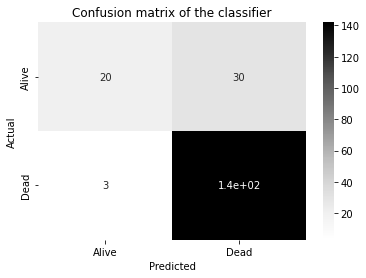

In [43]:
###############################################################################
# Logistic Regression 
###############################################################################
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1)
logreg_fit = logreg.fit(x_train, y_train)

logreg_pred = logreg_fit.predict(x_test)

print('Training Score', logreg_fit.score(x_train, y_train).round(4))
print('Testing Score:', logreg_fit.score(x_test, y_test).round(4))

#AUC Score 
# Generating Predictions based on the optimal model
logreg_fit_train = logreg_fit.predict(x_train)

logreg_fit_train_test = logreg_fit.predict(x_test)

print('Training ACCURACY:',roc_auc_score(
        y_train,logreg_fit_train).round(4))
print('Testing  ACCURACY:',roc_auc_score(
        y_test,logreg_fit_train_test).round(4))

#print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
#print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# Visualizing a confusion matrix

print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))



Predictions = pd.DataFrame({
        'Actual' : y_test,
        'Logreg Prediction' : logreg_pred})
Predictions.to_excel("Model_Predictions.xlsx")
    

import seaborn as sns

labels = ['Alive', 'Dead']

cm = confusion_matrix(y_true = y_test,
                      y_pred = logreg_pred)


sns.heatmap(cm,
            annot = True,
            xticklabels = labels,
            yticklabels = labels,
            cmap = 'Greys')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of the classifier')
plt.show()


In [44]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [45]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                n_jobs=-1,
                                random_state = 219)

In [46]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7813
Testing  ACCURACY: 0.8308
AUC Score        : 0.6897


Tuned Parameters  : {'warm_start': True, 'solver': 'lbfgs', 'C': 2.3000000000000003}
Tuned CV AUC      : 0.6259

In [47]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 1.8000000000000003,
                              warm_start   = False,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) 

LR Tuned Training ACCURACY: 0.7961
LR Tuned Testing  ACCURACY: 0.8256
LR Tuned AUC Score        : 0.6862


# CART Models

We are now going to try our CART models on our data

In [48]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

# Decision Tree

Instantiating our decision tree with default parameters

In [49]:
#Our scaled data from above is stored here for the train_test_split phase
#got_data   = x_scaled_df
got_data_1   = got.drop(['S.No', 'name','isAlive','title','culture', 'dateOfBirth',
                           'mother','father','heir','house','spouse'],axis=1)
got_data_2 = got.drop(['S.No', 'name','isAlive','title','culture','dateOfBirth','age',
                           'mother','father','heir','house','spouse'],axis=1)
got_data_3 = got.drop(['S.No', 'name','isAlive','title','culture',
                           'mother','father','heir','house','spouse'],axis=1)
#defining our target variable
got_data = got.loc[ : , candidate_dict['logit_sig_4']]
got_target =  got.loc[ : , 'isAlive']

x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.1,
            random_state = 219,
            stratify = got_target) # preserving balance

# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [50]:
#defining our train and target data
got_data = got.loc[ : , candidate_dict['logit_sig_4']]
got_target =  got.loc[ : , 'isAlive']

# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))



# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9075
Full Tree Testing ACCURACY : 0.8718
Full Tree AUC Score: 0.8352


In [51]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 13
True Positives : 132



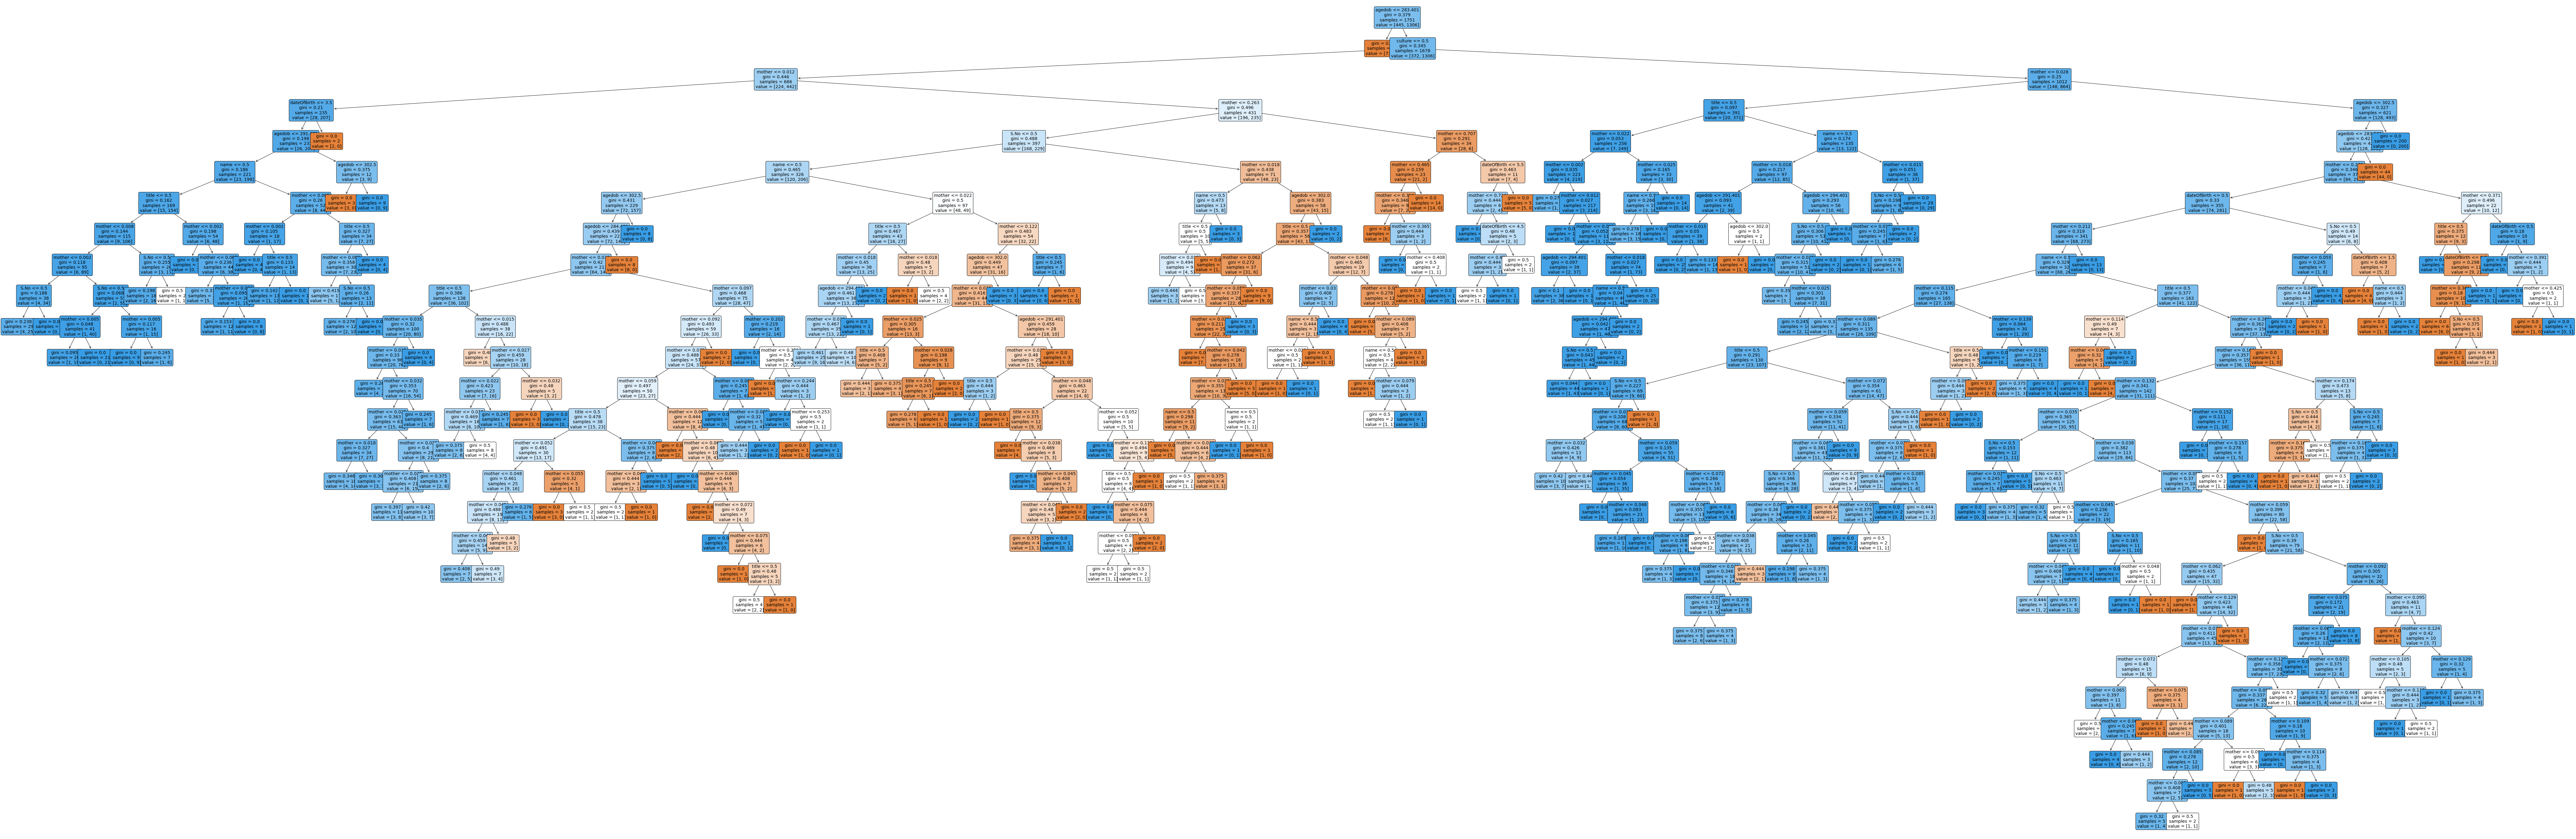

In [52]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

Lets us try another decision tree here, this time random state is fixed to 219

In [53]:
###############################################################################
# Decision Tree
###############################################################################


got_target = got.loc[:, 'isAlive']


x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.1,
            random_state = 219,
            stratify     = got_target)


# Full tree.
tree_alt = DecisionTreeClassifier(random_state = 219)
tree_alt_fit = tree_alt.fit(x_train, y_train)
tree_alt_pred = tree_alt_fit.predict(x_test)

print('Training Score', tree_alt.score(x_train, y_train).round(4))
print('Testing Score:', tree_alt.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_alt_pred).round(4))

Training Score 0.9075
Testing Score: 0.8769
AUC Score        : 0.8452


In [54]:
# unpacking the confusion matrix
tree_alt_tn, \
tree_alt_fp, \
tree_alt_fn, \
tree_alt_tp = confusion_matrix(y_true = y_test, y_pred = tree_alt_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tree_alt_tn}
False Positives: {tree_alt_fp}
False Negatives: {tree_alt_fn}
True Positives : {tree_alt_tp}
""")


True Negatives : 39
False Positives: 11
False Negatives: 13
True Positives : 132



# Hyperparameter Tuning for Tree

# Pruned Tree

In [55]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.8001
Testing  ACCURACY: 0.8103
AUC Score        : 0.63


In [56]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 0
True Positives : 145



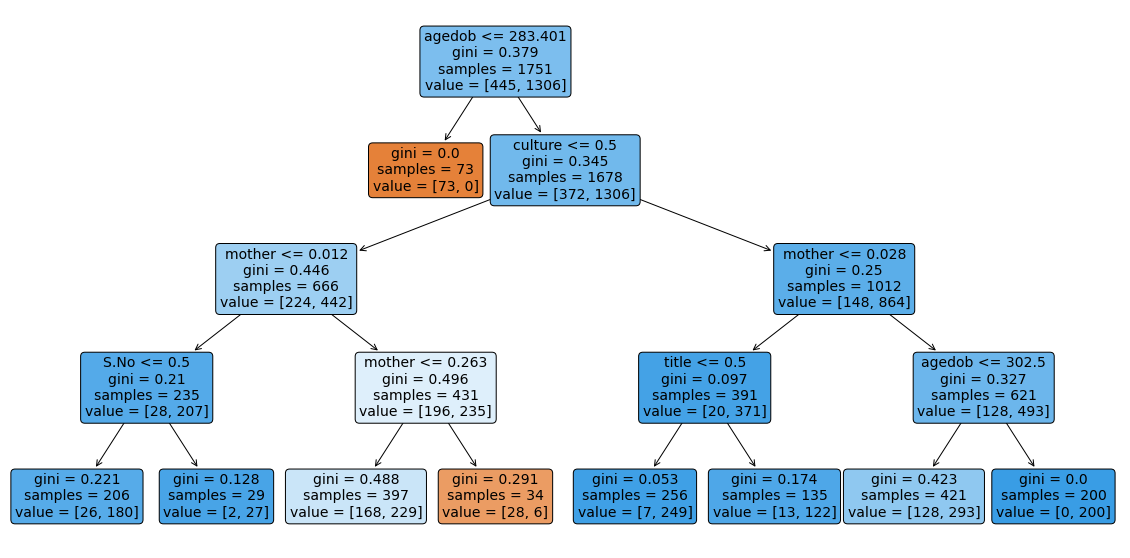

In [57]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

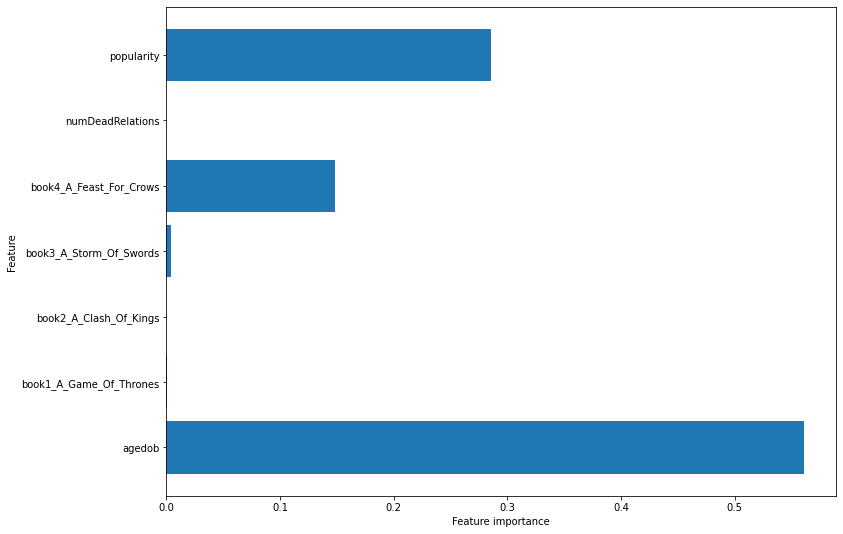

In [58]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

Let us try an alternative tree

In [59]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6897         (19, 31, 4, 141)
Full Tree     0.8352           (38, 12, 13, 132)
Pruned Tree   0.63         (13, 37, 0, 145)



# KNN

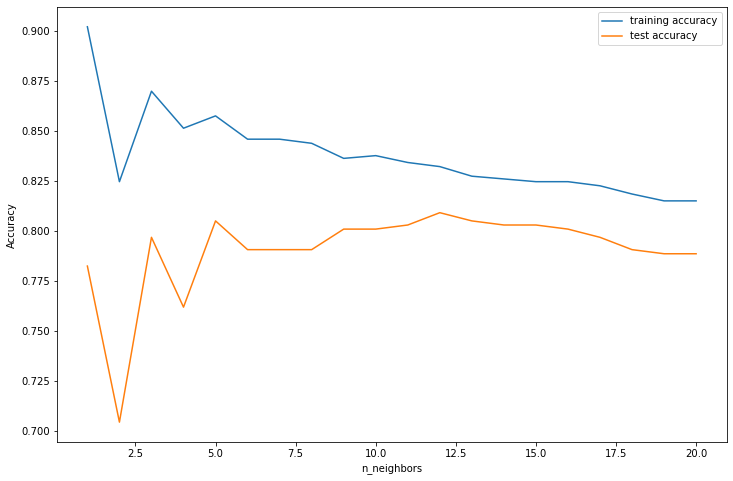

The optimal number of neighbors is: 12


In [60]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [61]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8281
Testing  ACCURACY: 0.8615
AUC Score        : 0.7955


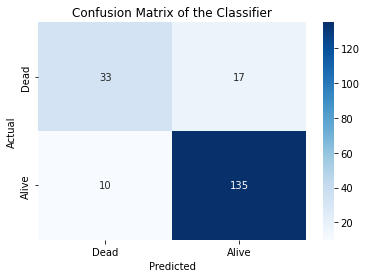

In [62]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Dead', 'Alive'])

In [63]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 10
True Positives : 135



Let's try another KNN here

In [64]:
###################################### KNN ##################################
# Creating two lists, one for training set accuracy and the other for test
# set accuracy
#training_accuracy = []
#test_accuracy = []



# Building a visualization to check to see  1 to 50
#neighbors_settings = range(1, 51)


#for n_neighbors in neighbors_settings:
    # Building the model
#    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
#    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
#    test_accuracy.append(clf.score(x_test, y_test))


# Plotting the visualization
#fig, ax = plt.subplots(figsize=(12,9))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show() 

#print(testaccuracy.index(max(test_accuracy))) -> to index lists
#print(test_accuracy.index(max(test_accuracy)))
 
# Building a model with k =16
knn_reg = KNeighborsClassifier(algorithm   = 'auto',
                              n_neighbors = 25)

# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(x_train_scaled, y_train_scaled)

# Scoring the model
#y_score_knn_optimal = knn_reg.score(x_test, y_test)


# Generating Predictions based on the optimal KNN model
#knn_reg_optimal_pred_train = knn_reg_fit.predict(x_train)
knn_reg_optimal_pred_test = knn_reg_fit.predict(x_test_scaled)

print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
#AUC Score 
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_reg_optimal_pred_test).round(4))
#print('Training AUC Score:',roc_auc_score(
#        y_train,knn_reg_optimal_pred_train),round(4))
#print('Testing AUC Score:',roc_auc_score(
#        y_test,knn_reg_optimal_pred_test),round(4))

Training ACCURACY: 0.8281
Testing  ACCURACY: 0.8615
AUC Score        : 0.7324


In [65]:
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhoo

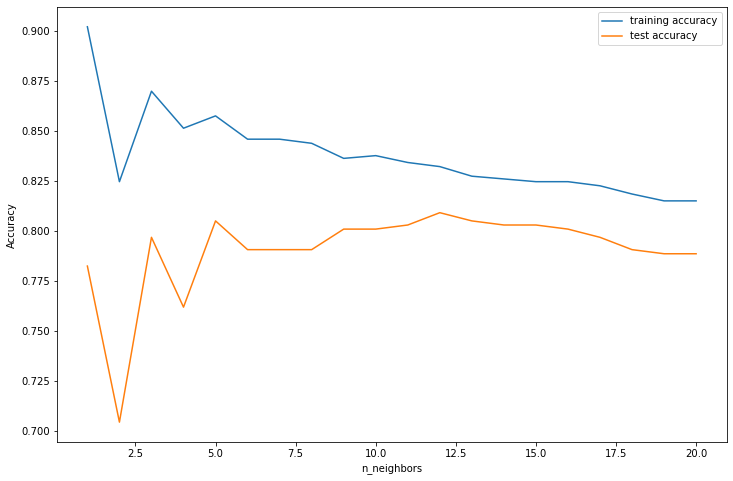

The optimal number of neighbors is: 12


In [66]:
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [67]:
# Instantiating a StandardScaler() object
#scaler = StandardScaler()


# Fitting the scaler with our data
#scaler.fit(got_scale_data)


# Transforming our data after fit
#X_scaled = scaler.transform(got_scale_data)


# Putting our scaled data into a DataFrame
#X_scaled_df = pd.DataFrame(X_scaled)

# Adding labels to our scaled DataFrame
#X_scaled_df.columns = got_scale_data.columns
#--------------------------

# INSTANTIATING StandardScaler()
#scaler = StandardScaler()


# FITTING the data
#scaler.fit(titanic_data)


# TRANSFORMING the data
#x_scaled     = scaler.transform(titanic_data)


# converting to a DataFrame
#x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
#x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
#            got_data,
#            got_target,
#            random_state = 219,
#            test_size    = 0.1,
#            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 10)


# FITTING the training data
#knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)
knn_classifier_fit = knn_classifier.fit(x_train, y_train)

# PREDICTING based on the testing set
#(original)knn_pred = knn_fit.predict(x_test_scaled)
knn_classifier_pred = knn_classifier_fit.predict(x_test)


# SCORING the results
#(org)print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
#(org)print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
#(org)print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                          y_score = knn_pred).round(4))
print('Training ACCURACY:', knn_classifier_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', knn_classifier_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_classifier_pred).round(4))


knn_classifier_optimal_pred_train = knn_classifier_fit.predict(x_train)
knn_classifier_optimal_pred_test = knn_classifier_fit.predict(x_test)


print('Training AUC Score:',roc_auc_score(
        y_train,knn_classifier_optimal_pred_train),round(4))
print('Testing AUC Score:',roc_auc_score(
        y_test,knn_classifier_optimal_pred_test),round(4))
# saving scoring data
#(org)knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
#(org)knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_train_score = knn_classifier_fit.score(x_train, y_train).round(4)
knn_test_score  = knn_classifier_fit.score(x_test, y_test).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_classifier_pred).round(4)

Training ACCURACY: 0.8567
Testing  ACCURACY: 0.8667
AUC Score        : 0.8317
Training AUC Score: 0.7809410327442916 4
Testing AUC Score: 0.8317241379310345 4


In [68]:
########################
# Model adjustments 
########################

#tree_leaf_50 = DecisionTreeRegressor(criterion = 'mse',
#                                     min_samples_leaf = 50,
#                                     random_state = 219)

#tree_leaf_50.fit(x_train, y_train)

#print('Training Score', tree_leaf_50.score(x_train, y_train).round(4))
#print('Testing Score:', tree_leaf_50.score(x_test, y_test).round(4))



# visualizing feature importance

########################
#def plot_feature_importances(model, train = x_train, export = False):
#    fig, ax = plt.subplots(figsize=(12,9))
#    n_features = x_train.shape[1]
#    plt.barh(range(n_features), model.feature_importances_, align='center')
#    plt.yticks(pd.np.arange(n_features), train.columns)
#    plt.xlabel("Feature importance")
#    plt.ylabel("Feature")
#    
#    if export == True:
#        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [69]:
########################

########################
# Tree with the important features
########################
#plot_feature_importances(tree_leaf_50,
#                         train = x_train,
#                         export = True)

#Dropping the non important features
#got_data   = got.drop(['isAlive',
#                       'name',
#                       'title',
 #                      'culture',
#                       'dateOfBirth',
#                        'mother',
#                        'father',
#                        'heir',
#                         'house',
#                        'spouse',
#                        'm_age',
#                        'm_isAliveSpouse',
#                        'm_isAliveHeir',
#                        'm_isAliveFather',
#                        'm_isAliveMother',
#                        'm_spouse',
#                        'm_heir',
#                        'm_mother',
#                        'm_father',
#                        'm_culture',
#                        'numDeadRelations',
#                        'age',
#                        'book2_A_Clash_Of_Kings',
#                        'isNoble',
#                        'isMarried',
#                        'isAliveSpouse',
#                        'isAliveHeir',
#                        'isAliveFather',
#                        'isAliveMother',
#                        ],axis=1)
#
#got_target = got.loc[:, 'isAlive']


#x_train, x_test, y_train, y_test = train_test_split(
#            got_data,
#            got_target,
#            test_size = 0.1,
#            random_state = 219)

# Cross-Validation on tree_leaf_50 (cv = 3)

#cv_tree_3 = cross_val_score(tree_leaf_50,
#                             got_data,
#                             got_target,
#                             cv = 3)


#print(cv_tree_3)


#print(pd.np.mean(cv_tree_3).round(3))


# Hyperparameter Tuning

We will tune our hyperparameters here so find out optimal parameters for our different models

here we run a RandomizedSearchCV between a defined C range

In [70]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : integer or real, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : integer or real
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off 

In [71]:
#lr_tuned_cv.cv_results_

In [72]:
#lr_tuned_cv.best_estimator_

Results of tuned logistic model

Let us now implement Hyperparameter Tuning on Classification Trees

Decision Tree Alternative

# Ensemble Modelling

In [73]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

# Random Forest

In [74]:
#Our scaled data from above is stored here for the train_test_split phase
#got_data   = x_scaled_df
got_data_1   = got.drop(['S.No', 'name','isAlive','title','culture', 'dateOfBirth',
                           'mother','father','heir','house','spouse'],axis=1)
got_data_2 = got.drop(['S.No', 'name','isAlive','title','culture','dateOfBirth','age',
                           'mother','father','heir','house','spouse'],axis=1)
got_data_3 = got.drop(['S.No', 'name','isAlive','title','culture',
                           'mother','father','heir','house','spouse'],axis=1)
#defining our target variable
got_data = got.loc[ : , candidate_dict['logit_sig_4']]
got_target =  got.loc[ : , 'isAlive']

x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.1,
            random_state = 219,
            stratify = got_target) # preserving balance

# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [75]:
# The deafault parameters to Random Forest Classifier
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [76]:

# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9075
Testing  ACCURACY: 0.8923
AUC Score        : 0.849


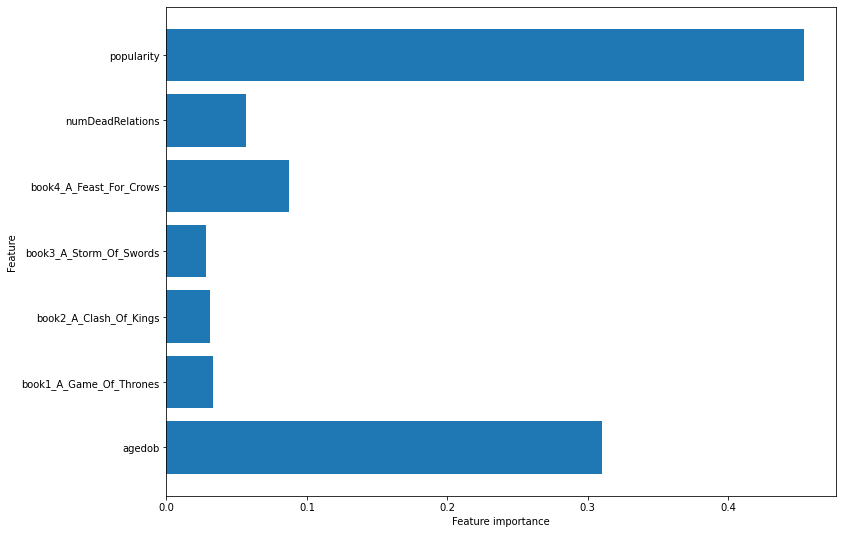

In [77]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [78]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 9
True Positives : 136



In [79]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7813,0.8308,"(19, 31, 4, 141)"
1,Full Tree,0.8352,0.9075,0.8718,"(38, 12, 13, 132)"
2,Pruned Tree,0.6300,0.8001,0.8103,"(13, 37, 0, 145)"
3,Random Forest (Full),0.8490,0.9075,0.8923,"(38, 12, 9, 136)"


We now are going to run RandomizedSearchCV

Params for RandomForest
Tuned Parameters  : {'warm_start': True, 'n_estimators': 850, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': True}
Tuned Training AUC: 0.7401

Params for RandomForest with max_depth = 8
Tuned Parameters  : {'warm_start': True, 'n_estimators': 600, 'min_samples_leaf': 1, 'max_depth': 7.000000000000005, 'criterion': 'entropy', 'bootstrap': False}
Tuned Training AUC: 0.7262


In [80]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [81]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  

In [82]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(warm_start       = True,
                                      n_estimators     = 600,
                                      min_samples_leaf = 1,
                                      bootstrap        = False,
                                      criterion        = 'entropy',
                                      random_state     = 219,
                                      max_depth = 7.000000000000005)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8572
Forest Tuned Testing  ACCURACY: 0.9179
Forest Tuned AUC Score        : 0.8466


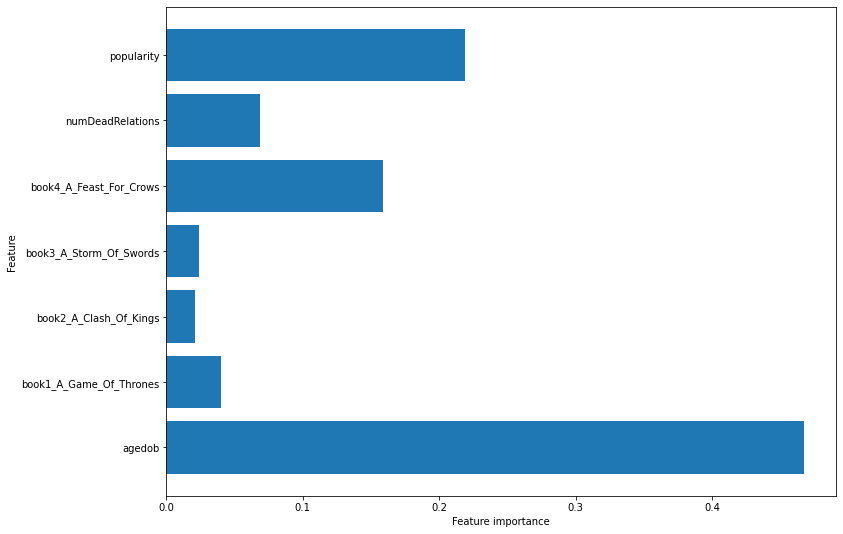

In [83]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

# Gradiant Boosted Machine

In [84]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.8,
                                              n_estimators  = 150,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 5,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.9075
Testing ACCURACY : 0.8923
AUC Score        : 0.8555


In [85]:
# unpacking the confusion matrix
gbm_default_tn_fb, \
gbm_default_fp_fb, \
gbm_default_fn_fb, \
gbm_default_tp_fb = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn_fb}
False Positives: {gbm_default_fp_fb}
False Negatives: {gbm_default_fn_fb}
True Positives : {gbm_default_tp_fb}
""")


True Negatives : 39
False Positives: 11
False Negatives: 10
True Positives : 135



In [86]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc_fb       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc_fb,
                          'Confusion Matrix'  : (gbm_default_tn_fb,
                                                 gbm_default_fp_fb,
                                                 gbm_default_fn_fb,
                                                 gbm_default_tp_fb)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7813,0.8308,"(19, 31, 4, 141)"
1,Full Tree,0.8352,0.9075,0.8718,"(38, 12, 13, 132)"
2,Pruned Tree,0.6300,0.8001,0.8103,"(13, 37, 0, 145)"
3,Random Forest (Full),0.8490,0.9075,0.8923,"(38, 12, 9, 136)"
4,GBM (Full),0.8555,0.9075,0.8923,"(39, 11, 10, 135)"


Now let's try Hyperparameter Tuning on GBM

Params for GBM
Tuned Parameters  : {'warm_start': True, 'n_estimators': 225, 'max_depth': 5.200000000000003, 'learning_rate': 0.1}
Tuned Training AUC: 0.7539

In [87]:
#full_gbm_cv.best_estimator_

In [88]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(warm_start= True,
                                       n_estimators= 225,
                                       max_depth= 5.200000000000003,
                                       learning_rate= 0.1)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.9046
Testing  ACCURACY: 0.9385
AUC Score        : 0.8997


In [89]:
# unpacking the confusion matrix
gbm_tuned_tn_best, \
gbm_tuned_fp_best, \
gbm_tuned_fn_best, \
gbm_tuned_tp_best = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn_best}
False Positives: {gbm_tuned_fp_best}
False Negatives: {gbm_tuned_fn_best}
True Positives : {gbm_tuned_tp_best}
""")


True Negatives : 41
False Positives: 9
False Negatives: 3
True Positives : 142



In [90]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc_best       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : '***Tuned GBM***',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc_best,
                          'Confusion Matrix'   : (gbm_tuned_tn_best,
                                                  gbm_tuned_fp_best,
                                                  gbm_tuned_fn_best,
                                                  gbm_tuned_tp_best)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7813,0.8308,"(19, 31, 4, 141)"
1,Full Tree,0.8352,0.9075,0.8718,"(38, 12, 13, 132)"
2,Pruned Tree,0.6300,0.8001,0.8103,"(13, 37, 0, 145)"
3,Random Forest (Full),0.8490,0.9075,0.8923,"(38, 12, 9, 136)"
4,GBM (Full),0.8555,0.9075,0.8923,"(39, 11, 10, 135)"
5,***Tuned GBM***,0.8997,0.9046,0.9385,"(41, 9, 3, 142)"


In [91]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
5,***Tuned GBM***,0.8997,0.9046,0.9385,"(41, 9, 3, 142)"
4,GBM (Full),0.8555,0.9075,0.8923,"(39, 11, 10, 135)"
3,Random Forest (Full),0.8490,0.9075,0.8923,"(38, 12, 9, 136)"
1,Full Tree,0.8352,0.9075,0.8718,"(38, 12, 13, 132)"
0,Logistic,0.6897,0.7813,0.8308,"(19, 31, 4, 141)"
2,Pruned Tree,0.6300,0.8001,0.8103,"(13, 37, 0, 145)"


In [92]:
# saving the DataFrame to Excel
model_performance.to_excel('./__results/classification_model_performance.xlsx',
                           index = False)

# GBM 2

Let us try GBM one more time

In [93]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8686
Testing ACCURACY : 0.8923
AUC Score        : 0.8293


In [94]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 6
True Positives : 139



In [95]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7813,0.8308,"(19, 31, 4, 141)"
1,Full Tree,0.8352,0.9075,0.8718,"(38, 12, 13, 132)"
2,Pruned Tree,0.6300,0.8001,0.8103,"(13, 37, 0, 145)"
3,Random Forest (Full),0.8490,0.9075,0.8923,"(38, 12, 9, 136)"
4,GBM (Full),0.8555,0.9075,0.8923,"(39, 11, 10, 135)"
5,***Tuned GBM***,0.8997,0.9046,0.9385,"(41, 9, 3, 142)"
6,GBM (Full),0.8293,0.8686,0.8923,"(35, 15, 6, 139)"


Tuned Tree after Hyperparameter Tuning

In [96]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.30000000000000004,
                                       max_depth     = 3.9000000000000017,
                                       n_estimators  = 345,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.9006
Testing  ACCURACY: 0.9179
AUC Score        : 0.8859


In [97]:
# unpacking the confusion matrix
gbm_tuned_tn_2, \
gbm_tuned_fp_2, \
gbm_tuned_fn_2, \
gbm_tuned_tp_2 = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn_2}
False Positives: {gbm_tuned_fp_2}
False Negatives: {gbm_tuned_fn_2}
True Positives : {gbm_tuned_tp_2}
""")


True Negatives : 41
False Positives: 9
False Negatives: 7
True Positives : 138



In [98]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc_tuned_2       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM 2',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc_tuned_2,
                          'Confusion Matrix'   : (gbm_tuned_tn_2,
                                                  gbm_tuned_fp_2,
                                                  gbm_tuned_fn_2,
                                                  gbm_tuned_tp_2)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6897,0.7813,0.8308,"(19, 31, 4, 141)"
1,Full Tree,0.8352,0.9075,0.8718,"(38, 12, 13, 132)"
2,Pruned Tree,0.6300,0.8001,0.8103,"(13, 37, 0, 145)"
3,Random Forest (Full),0.8490,0.9075,0.8923,"(38, 12, 9, 136)"
4,GBM (Full),0.8555,0.9075,0.8923,"(39, 11, 10, 135)"
5,***Tuned GBM***,0.8997,0.9046,0.9385,"(41, 9, 3, 142)"
6,GBM (Full),0.8293,0.8686,0.8923,"(35, 15, 6, 139)"
7,Tuned GBM 2,0.8859,0.9006,0.9179,"(41, 9, 7, 138)"


In [99]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
5,***Tuned GBM***,0.8997,0.9046,0.9385,"(41, 9, 3, 142)"
7,Tuned GBM 2,0.8859,0.9006,0.9179,"(41, 9, 7, 138)"
4,GBM (Full),0.8555,0.9075,0.8923,"(39, 11, 10, 135)"
3,Random Forest (Full),0.8490,0.9075,0.8923,"(38, 12, 9, 136)"
1,Full Tree,0.8352,0.9075,0.8718,"(38, 12, 13, 132)"
6,GBM (Full),0.8293,0.8686,0.8923,"(35, 15, 6, 139)"
0,Logistic,0.6897,0.7813,0.8308,"(19, 31, 4, 141)"
2,Pruned Tree,0.6300,0.8001,0.8103,"(13, 37, 0, 145)"


In [100]:
# comparing results
print(f"""
  Model          AUC Score      TN, FP, FN, TP
  -----          ---------      --------------
*Tuned GBM*      *{gbm_auc_best}*      *{gbm_tuned_tn_best, gbm_tuned_fp_best, gbm_tuned_fn_best, gbm_tuned_tp_best}*
Tuned GBM 2       {gbm_auc_tuned_2}        {gbm_tuned_tn_2, gbm_tuned_fp_2, gbm_tuned_fn_2, gbm_tuned_tp_2}
GBM (Full)        {gbm_auc_fb}        {gbm_default_tn_fb, gbm_default_fp_fb, gbm_default_fn_fb, gbm_default_tp_fb}
""")


  Model          AUC Score      TN, FP, FN, TP
  -----          ---------      --------------
*Tuned GBM*      *0.8997*      *(41, 9, 3, 142)*
Tuned GBM 2       0.8859        (41, 9, 7, 138)
GBM (Full)        0.8555        (39, 11, 10, 135)



We choose Tuned GBM model since it has the best confusion matrix: least amount of FN and FP and highest amount of TP and TN. AUC score of this one is a perfect score of 0.8997.